In [529]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [530]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf

import math

In [531]:
file_path = Path(r"C:/Users/AYOOLA5\Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_ratings.csv")
IMbd_ratings_df = pd.read_csv(file_path)
IMbd_ratings_df.head() 

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [532]:
file_path = Path(r"C:/Users/AYOOLA5\Desktop/University of Toronto/GROUP PROJECT/GROUP_PROJECT/PROJECT DATA ANALYTICS/IMDb_movies1.csv")
movies_df = pd.read_csv(file_path)
movies_df.head() 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0
2,tt0001892,Drama,53,"Germany, Denmark",NaN,5.8,188,NaN,5.0,2.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0


In [533]:
#Selecting relevant data from IMDb_ratings
clean_ratings_df = IMbd_ratings_df[["imdb_title_id",
                             "weighted_average_vote",
                             "total_votes",
                             "allgenders_0age_votes",
                             "allgenders_18age_votes",
                             "allgenders_30age_votes",
                             "allgenders_45age_votes",
                             "males_allages_votes",
                             "females_allages_votes"]]
clean_ratings_df.head()

,imdb_title_id,weighted_average_vote,total_votes,allgenders_0age_votes,allgenders_18age_votes,allgenders_30age_votes,allgenders_45age_votes,males_allages_votes,females_allages_votes
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [534]:
#renaming headers in ratings data to avoid confusion
new_names = {"allgenders_0age_votes":"tot_voters_below_18",
            "allgenders_18age_votes":"tot_voters_below_30",
            "allgenders_30age_votes":"tot_voters_below_45",
            "allgenders_45age_votes" : "tot_voters_above_45",
            "males_allages_votes":"tot_male_voters",
             "females_allages_votes": "tot_female_voters"}
ratings_df = clean_ratings_df.rename(columns=new_names)
ratings_df.head(5)

,imdb_title_id,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [535]:
imdb_data_df = pd.merge(movies_df,ratings_df, on="imdb_title_id", how="outer")
imdb_data_df.head()

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_18,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,4.0,38.0,50.0,35.0,97.0,35.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,1.0,114.0,239.0,115.0,425.0,50.0
2,tt0001892,Drama,53,"Germany, Denmark",NaN,5.8,188,NaN,5.0,2.0,5.8,188,NaN,25.0,72.0,62.0,146.0,15.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,NaN,23.0,111.0,193.0,299.0,39.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,4.0,402.0,895.0,482.0,1607.0,215.0


In [536]:
#total null values in each column
imdb_data_df.isnull().sum()

imdb_title_id                0
genre                        0
duration                     0
country                     64
language                   833
avg_vote                     0
votes                        0
budget                   62145
reviews_from_users        7597
reviews_from_critics     11797
weighted_average_vote        0
total_votes                  0
tot_voters_below_18      52496
tot_voters_below_30        706
tot_voters_below_45         10
tot_voters_above_45         80
tot_male_voters              1
tot_female_voters           81
dtype: int64

In [537]:
#Combining under 18 and under 30 columns to reduce null values in tot_voters_below_18 column
below_18 = imdb_data_df["tot_voters_below_18"]
below_30 = imdb_data_df["tot_voters_below_30"]

combined = []

#Initiating for loop to add values in below 18 and below 30 columns 
#Appending it to combined list to replace both columns by combined

for i in range(len(imdb_data_df)):
    if math.isnan(below_18[i]) is True & math.isnan(below_30[i]) is True:
        combined.append(below_18[i] + below_30[i])
        

    elif math.isnan(below_18[i]) is True and math.isnan(below_30[i]) is False:
        combined.append(below_30[i])
            
    elif math.isnan(below_18[i]) == False and math.isnan(below_30[i]) == True:
        combined.append(below_18[i])
            
    else:
        combined.append(0)

In [538]:
# Dropping under 18 columns
imdb_data_df = imdb_data_df.drop("tot_voters_below_18", axis = 1)

# Repacing under 18 and under 30 columns by under 30(combined)
imdb_data_df["tot_voters_below_18"] = combined

In [539]:
#dropping empty values
imdb_data_df = imdb_data_df.dropna(subset =["language"])
imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [540]:
imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [541]:
Clean_imdb_data_df = imdb_data_df.drop(["imdb_title_id"],1)
Clean_imdb_data_df

,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [564]:
#Clean_imdb_data_df = Clean_imdb_data_df["genre"].str.split(',',expand=True)
#Clean_imdb_data_df

#Clean_imdb_data_df.assign(genre1  = Clean_imdb_data_df.genre.str.split("|", expand = True).iloc[:,:1],
                          #genre2 = Clean_imdb_data_df.genre.str.split("|", expand = True).iloc[:,1:2])




In [584]:
Clean_imdb_data_df = imdb_data_df.drop_duplicates()
Clean_imdb_data_df 

,imdb_title_id,genre,duration,country,language,avg_vote,votes,budget,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,tt0000009,Romance,45,USA,None,5.9,154,NaN,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,tt0000574,"Biography, Crime, Drama",70,Australia,None,6.1,589,"$2,250",7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,tt0002101,"Drama, History",100,USA,English,5.2,446,"$45,000",25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,tt0002130,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,NaN,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,tt0002199,"Biography, Drama",60,USA,English,5.7,484,NaN,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Comedy,95,"France, Belgium",French,5.3,398,NaN,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,tt9911196,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,NaN,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,tt9911774,Drama,130,India,Malayalam,7.9,265,NaN,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,tt9914286,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [585]:
Clean_imdb_data_df.dtypes


imdb_title_id             object
genre                     object
duration                   int64
country                   object
language                  object
avg_vote                 float64
votes                      int64
budget                    object
reviews_from_users       float64
reviews_from_critics     float64
weighted_average_vote    float64
total_votes                int64
tot_voters_below_30      float64
tot_voters_below_45      float64
tot_voters_above_45      float64
tot_male_voters          float64
tot_female_voters        float64
tot_voters_below_18      float64
dtype: object

In [586]:
print(f"Duplicates entries: {Clean_imdb_data_df.duplicated().sum()}")

Duplicates entries: 0


In [587]:
Clean_imdb_data_df1 = imdb_data_df.drop(["imdb_title_id","budget"],1)
Clean_imdb_data_df1

,genre,duration,country,language,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,Comedy,95,"France, Belgium",French,5.3,398,NaN,4.0,5.3,398,42.0,137.0,101.0,267.0,26.0,0.0
85851,"Comedy, Drama",103,Netherlands,"German, Dutch",7.7,724,6.0,4.0,7.7,724,105.0,207.0,194.0,412.0,109.0,105.0
85852,Drama,130,India,Malayalam,7.9,265,NaN,NaN,7.9,265,1.0,1.0,1.0,4.0,NaN,1.0
85853,"Drama, Family",98,Turkey,Turkish,6.4,194,NaN,NaN,6.4,194,2.0,5.0,3.0,10.0,2.0,2.0


In [588]:
Clean_imdb_data_df1 = Clean_imdb_data_df1.dropna()
Clean_imdb_data_df1 

,genre,duration,country,language,avg_vote,votes,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,tot_voters_below_30,tot_voters_below_45,tot_voters_above_45,tot_male_voters,tot_female_voters,tot_voters_below_18
0,Romance,45,USA,None,5.9,154,1.0,2.0,5.9,154,38.0,50.0,35.0,97.0,35.0,0.0
1,"Biography, Crime, Drama",70,Australia,None,6.1,589,7.0,7.0,6.1,589,114.0,239.0,115.0,425.0,50.0,0.0
3,"Drama, History",100,USA,English,5.2,446,25.0,3.0,5.2,446,23.0,111.0,193.0,299.0,39.0,23.0
4,"Adventure, Drama, Fantasy",68,Italy,Italian,7.0,2237,31.0,14.0,7.0,2237,402.0,895.0,482.0,1607.0,215.0,0.0
5,"Biography, Drama",60,USA,English,5.7,484,13.0,5.0,5.7,484,35.0,177.0,168.0,354.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85842,"Animation, Adventure, Crime",58,Japan,Japanese,6.9,103,1.0,1.0,6.9,103,22.0,30.0,8.0,64.0,3.0,22.0
85843,"Action, Thriller",145,India,Tamil,8.5,8400,188.0,8.0,8.5,8400,2297.0,1469.0,84.0,4577.0,121.0,0.0
85846,War,92,UK,"English, Polish, Russian, German",5.0,764,29.0,6.0,5.0,764,37.0,135.0,151.0,310.0,36.0,0.0
85849,"Comedy, Drama",122,India,Malayalam,6.8,491,9.0,1.0,6.8,491,134.0,117.0,7.0,289.0,8.0,134.0


In [589]:
# Determine the number of unique values in each column.
ratings_cat = Clean_imdb_data_df1.dtypes[Clean_imdb_data_df1.dtypes == "object"].index.tolist()
ratings_cat 

['genre', 'country', 'language']

In [590]:
Clean_imdb_data_df[ratings_cat ].nunique()

genre       1254
country     4888
language    4377
dtype: int64

In [591]:
genre = Clean_imdb_data_df.genre.value_counts()
genre 

Drama                          12369
Comedy                          7614
Comedy, Drama                   4007
Drama, Romance                  3422
Comedy, Romance                 2487
                               ...  
Action, Crime, Music               1
Drama, Crime, Film-Noir            1
Action, Mystery, Drama             1
Music, War, Western                1
Adventure, Mystery, Western        1
Name: genre, Length: 1254, dtype: int64

<AxesSubplot:ylabel='Density'>

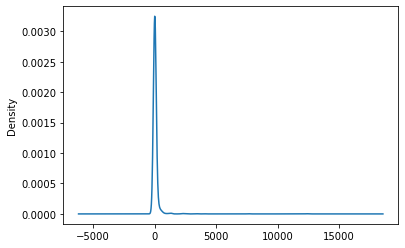

In [592]:
# Visualize the value counts of genre
genre.plot.density()

In [593]:
# Determine which values to replace if counts are less than ...?
replace_genre = list(genre [genre < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df.genre = Clean_imdb_data_df.genre.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df.genre.value_counts()

Other                        34553
Drama                        12369
Comedy                        7614
Comedy, Drama                 4007
Drama, Romance                3422
Comedy, Romance               2487
Comedy, Drama, Romance        2276
Horror                        2227
Drama, Thriller               1339
Crime, Drama                  1334
Action, Crime, Drama          1306
Thriller                      1218
Horror, Thriller              1198
Crime, Drama, Thriller        1014
Action, Drama                  879
Drama, War                     756
Action                         700
Crime, Drama, Mystery          665
Action, Adventure, Drama       607
Action, Adventure, Comedy      602
Comedy, Crime                  588
Western                        583
Comedy, Horror                 567
Action, Thriller               563
Comedy, Crime, Drama           556
Horror, Mystery, Thriller      554
Action, Comedy, Crime          536
Action, Crime, Thriller        502
Name: genre, dtype: 

In [594]:
# Look at duration value counts for binning
duration= Clean_imdb_data_df.duration.value_counts()
duration

90     5107
95     3166
100    3076
93     2398
92     2390
       ... 
421       1
357       1
293       1
229       1
319       1
Name: duration, Length: 264, dtype: int64

<AxesSubplot:ylabel='Density'>

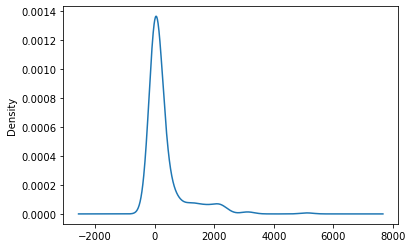

In [595]:
# Visualize the value counts of duration
duration.plot.density()

In [596]:
# Determine which values to replace if counts are less than ...?
replace_duration = list(duration [duration < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df.duration = Clean_imdb_data_df.duration.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df.duration.value_counts()

90     5107
95     3166
100    3076
93     2398
92     2390
       ... 
421       1
357       1
293       1
229       1
319       1
Name: duration, Length: 264, dtype: int64

In [597]:
country = Clean_imdb_data_df.country.value_counts()
country

USA                                    28166
India                                   6040
UK                                      4035
Japan                                   3051
France                                  3031
                                       ...  
UK, Bulgaria, USA                          1
Canada, UK, Czech Republic                 1
France, Morocco, Germany, Palestine        1
China, Singapore                           1
USA, Canada, New Zealand                   1
Name: country, Length: 4888, dtype: int64

<AxesSubplot:ylabel='Density'>

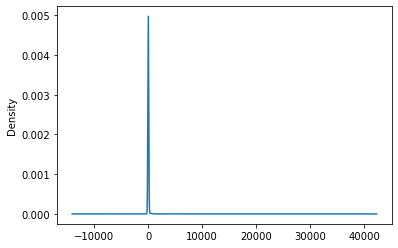

In [598]:
# Visualize the value counts of duration
country.plot.density()

In [599]:
# Determine which values to replace if counts are less than ...?
replace_country = list(country [country < 500].index)

# Replace in dataframe
for app in replace_genre:
      Clean_imdb_data_df.country = Clean_imdb_data_df.country.replace(app,"Other")
    
# Check to make sure binning was successful
Clean_imdb_data_df.country.value_counts()

USA                                    28166
India                                   6040
UK                                      4035
Japan                                   3051
France                                  3031
                                       ...  
UK, Bulgaria, USA                          1
Canada, UK, Czech Republic                 1
France, Morocco, Germany, Palestine        1
China, Singapore                           1
USA, Canada, New Zealand                   1
Name: country, Length: 4888, dtype: int64

In [601]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(Clean_imdb_data_df[ratings_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(ratings_cat)
encode_df.head()

MemoryError: Unable to allocate 5.89 GiB for an array with shape (85022, 9294) and data type float64

In [602]:
# Merge one-hot encoded features and drop the originals
Clean_imdb_data_df1 = Clean_imdb_data_df1.merge(encode_df,left_index=True, right_index=True)
Clean_imdb_data_df1 = Clean_imdb_data_df1.drop(ratings_cat,1)
Clean_imdb_data_df1.head()

MemoryError: Unable to allocate 577. MiB for an array with shape (18284, 4138) and data type float64

In [ ]:
Clean_imdb_data_df1

In [ ]:
# Split our preprocessed data into our features and target arrays
y = Clean_imdb_data_df1["avg_vote"]
X = Clean_imdb_data_df1.drop(["avg_vote"],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 60
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
new_fit_model = nn.fit(X_train_scaled, y_train, epochs=100, shuffle=True)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")